In [1]:
%matplotlib inline

*(Note: `%matplotlib notebook` allows for fancier interactivity in plots than `%matplot inline`, but it seems to possibly have some bugs still so I went back to inline for now)*

# 592B, Class 2.2 (02/01). Fourier series, aliasing, Sampling theorem

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile 

from ipywidgets import interactive
from IPython.display import Audio, display

## Sine waves and cosine waves

Let's review the relation between sine and cosine waves. Let's plot a sine wave and a cosine wave:

$$y_{sin} = A \sin(440\pi t)$$
$$y_{cos} = A \cos(440\pi t)$$

In [3]:
fs = 44100 # define the sampling rate, f_s = 144100 Hz

t_start = 0 # We start sampling at t = 0s
t_stop =  3 # We stop sampling at t = 3s

ns = (t_stop - t_start) * fs + 1

x = np.linspace(t_start, t_stop, ns)

f = 440 # frequency of y1 and y2

y_sin = np.sin(2*np.pi*f*x)
y_cos = np.cos(2*np.pi*f*x)

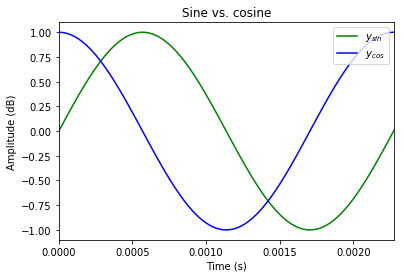

In [4]:
plt.figure("Sine vs. cosine")
plt.title("Sine vs. cosine")
plt.xlim(0,1/f) # What is 1/f?

plt.plot(x,y_sin, 'g', label='$y_{sin}$')
plt.plot(x,y_cos, 'b', label='$y_{cos}$')

plt.legend(loc="upper right") 
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (dB)')
plt.show(1)

*** In-class exercise: how could I get the blue line by modifying the parameters of $y_{sin}(t)$?***

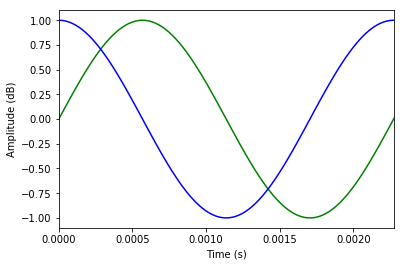

In [5]:
plt.figure("Sine vs. cosine")
plt.xlim(0,1/f) # What is 1/f?

plt.plot(x,y_sin, 'g', label='$y_{sin}$')
plt.plot(x,y_cos, 'b', label='$y_{cos}$')

#plt.legend(loc="upper right") 
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (dB)')
plt.show()

## Leftovers from Tuesday: converting between samples and timepoints

We read in some Hmong audio and plotted it, as in the cell below.

35015


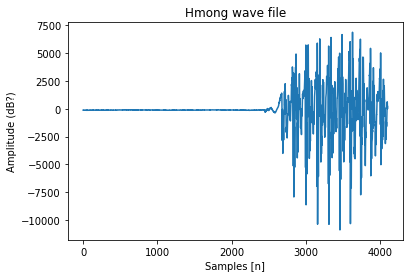

In [6]:
# From https://stackoverflow.com/questions/18644166/how-to-manipulate-wav-file-data-in-python
fs, hmong_data = wavfile.read('hmong_m6_24_c.wav')


n = 4096 # number of samples to plot

# Set up a new figure
plt.figure("hmong")

# plot the first n samples
plt.plot(hmong_data[0:n])
# label the axes
plt.ylabel("Amplitude (dB?)")
plt.xlabel("Samples [n]")
# set the title  
plt.title("Hmong wave file")

print(len(hmong_data))

Then you were working on this:

***In-class exercise: Plot the first second of the Hmong audio file, with a real time axis, i.e., time should be in seconds, not in samples. Hint: knowing the sampling rate will help you do this! I put a cell below for you to get started.***

***And if you finish that, can you also write a function that will plot the audio file from some start time `t_start` to some stop time `t_stop`?***


ns =  6615
n_start =  11025
n_stop =  17640
len(data[n_start:n_stop]) =  6615
len(x)=  6615


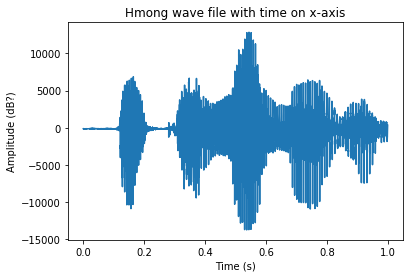

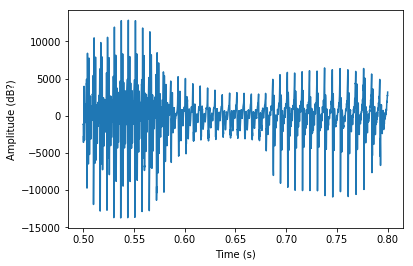

In [7]:
# Recall that fs is 22050 Hz. So that means the first second is the first 22050 samples.

ns = fs # number of samples is 22050
# So we can use np.linspace to define a vector of sampled time points from 0 to 1 seconds.

x = np.linspace(0, 1, ns)

# Set up a new figure
plt.figure("hmong with time on x-axis")

# plot the first n samples
plt.plot(x, hmong_data[0:ns])
# label the axes
plt.ylabel("Amplitude (dB?)")
plt.xlabel("Time (s)")
# set the title  
plt.title("Hmong wave file with time on x-axis")

# In general, suppose we want to plot the audio from t_start to t_stop.
# Then we could do: x = np.linspace(t_start, t_stop, ns)
# But what's ns? We did that in the Class 1.2 notebook.
# ns = (t_stop - t_start) / Ts + 1 
# Or, if we are ignoring the +/- 1 sample, ns = (t_stop - t_start) * fs
# So, we can do this:

def plot_with_time_axis(t_start, t_stop, fs_data, DEBUG = True, data=hmong_data):
    ns = int((t_stop - t_start) * fs_data) # number of samples from t_start to t_stop
    if DEBUG: print("ns = ", ns)
    n_start = int(round(t_start * fs_data)) # sample number corresponding to t_start
    if DEBUG: print("n_start = ", n_start)
    n_stop = int(round(t_stop * fs_data)) # sample number corresponding to t_stop
    if DEBUG: 
        print("n_stop = ", n_stop)
        print("len(data[n_start:n_stop]) = ", len(data[n_start:n_stop]))
    x = np.linspace(t_start, t_stop, ns)
    if DEBUG: print("len(x)= ", len(x))
    plt.figure()
    plt.plot(x, data[n_start:n_stop])
    # label the axes
    plt.ylabel("Amplitude (dB?)")
    plt.xlabel("Time (s)")

plot_with_time_axis(0.5, 0.8, fs)    
#plot_with_time_axis(0.5, 0.55, fs)  # oops, an error!  Why? 

# how could we make this code more robust? -> HW


## Adding up sine waves: towards Fourier series

Let's take the two sinusoidal signals we worked on last week and in your homework and try adding them up.


In [28]:
fs = 44100 # define the sampling rate, f_s = 44.1 kHz

t_start = 0 # We start sampling at t = 0s
t_stop =  1 # We stop sampling at t = 1s

ns = (t_stop - t_start) * fs + 1

x = np.linspace(t_start, t_stop, ns)


f1 = 440 # frequency of y_1(t)
f2 = 220 # frequency of y_2(t)

y1 = np.sin(2*np.pi*f1*x)
y2 = np.sin(2*np.pi*f2*x)

y1_plus_y2 = y1+y2


Text(0.5,1,'Adding up sines')

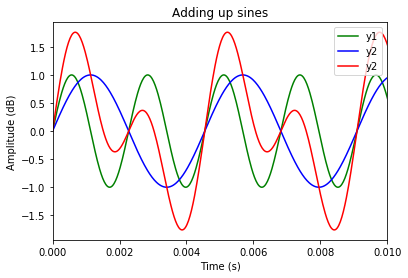

In [30]:
plt.figure("Adding up sines") # Create a new figure

plt.xlim(0,0.01)
plt.plot(x , y1, "-g", label="y1") # plot (x,y1) as a green line
plt.plot(x , y2, "-b", label="y2") # plot (x,y2) as a blue line
plt.plot(x , y1_plus_y2, "-r", label="y2") # plot (x,y2) as a blue line


#plt.stem(x,y1, 'r', )
plt.legend(loc="upper right") 
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (dB)')
plt.title("Adding up sines") 


You should play with setting other parameters! Remember, you can listen to your generated sinusoids too, using `Audio`. 

Below is some code that creates an interactive "widget" for both plotting and playing two sine waves and their superposition (sum).

You need to import these libraries, as we did at the beginning of the notebook:
```python
from ipywidgets import interactive
from IPython.display import Audio, display
```
The code is inspired by this [beat frequencies demo](https://ipywidgets.readthedocs.io/en/stable/examples/Beat%20Frequencies.html).

In [113]:
def plot_play_summed_sines(f1 = 440, f2 = 880, t_start = 0, t_stop = 2, fs = 44100, xlim_max = 0.01):
    x = np.linspace(t_start, t_stop, fs * (t_stop - t_start))
    y1 = np.sin(2*np.pi*f1*x)
    y2 = np.sin(2*np.pi*f2*x)
    
    plt.xlim(t_start,xlim_max)
    plt.plot(x , y1, "-g", label="y1") 
    plt.plot(x , y2, "-b", label="y2") 
    plt.plot(x , y1 + y2, "-r", label="y1+y2") 
    plt.legend(loc="upper right") 
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (dB)')
    plt.title("Adding up sines") 
    
    display(Audio(data=y1, rate=fs))
    display(Audio(data=y2, rate=fs))
    display(Audio(data=y1+y2, rate=fs))

In [114]:
v = interactive(plot_play_summed_sines, f1=(100,900), f2=(100,900), t_start = (0,0), t_stop = (0,5))
display(v)

A Jupyter Widget



## A first look at Fourier series

Recall from last week that a standard definition of a sinusoidal signal (i.e., a sine wave) is given as function of time $t$:

$$y(t) = A \sin (\omega t + \phi) $$

where:
- $A$ is the amplitude
- $\omega$ is the angular frequency, n.b., $\omega = 2\pi f$ (where $f$ is the frequency in cycles per second (Hertz or Hz))
- $\phi$ is the phase shift 

One standard definition of a Fourier series is:

\begin{equation}
      f(t) = a_0 + \displaystyle\sum\limits_{n=1}^N \left(a_n\cos(2\pi nt) + b_n\sin(2\pi nt)\right)
\end{equation}

where

$n \in \mathbb{Z}$, and $a_0 \ldots a_n$ and $b_0 \ldots b_n$ are called **Fourier coefficients**. Note that these are amplitude values for each component sinusoidal function in the sum: they provide weights for the individual components in the sum. We'll see later that these determine the amplitude of peaks in a spectrum of $f(t)$.

***Discussion: Why is there no $b_0$ in the formula?***

Let's see what each of the individual $a_n\cos(2\pi nt) + b_n\sin(2\pi nt)$ terms look like, for $a_n = b_n = 1$ for all $n$, for $N <6$. And let's include the $a_0$ term by starting at $N=0$.

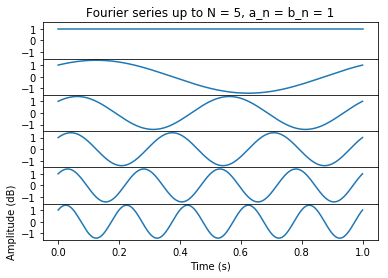

In [162]:
# Inspired by https://matplotlib.org/examples/pylab_examples/subplots_demo.html Three subplots sharing both x/y axes

t_start = 0; t_stop = 1; fs = 1000
x = np.linspace(t_start, t_stop, fs * (t_stop - t_start))
y = [np.sin(2*np.pi*f*x) + np.cos(2*np.pi*f*x) for f in np.arange(0,6)]

f_fourier_series, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, sharex=True, sharey=True)
ax1.plot(x , y[0], "-", label="n = 0")
ax1.set_title('Fourier series up to N = 5, a_n = b_n = 1')
ax2.plot(x , y[1], "-", label="n = 1")
ax3.plot(x , y[2], "-", label="n = 2")
ax4.plot(x , y[3], "-", label="n = 3")
ax5.plot(x , y[4], "-", label="n = 4")
ax6.plot(x , y[5], "-", label="n = 5")

plt.xlabel('Time (s)')
plt.ylabel('Amplitude (dB)')

# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f_fourier_series.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f_fourier_series.axes[:-1]], visible=False)


These are the first 6 terms in a **set of basis functions**, in particular, the **Fourier basis functions**. Each term, for some given $N$, is a basis function. In the limit, as $N \rightarrow \infty$ we can approximate any function with this set of basis functions. And each of the basis functions are **orthogonal** to one another. For intuition, we'll review vector spaces and orthogonal vectors.

Below, we "multiply" one basis function by another to illustrate orthogonality: the integral of the product of any two of the basis functions is 0.

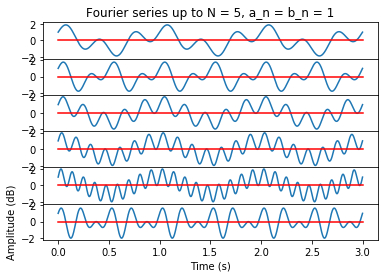

In [176]:
t_start = 0; t_stop = 3; fs = 1000
x = np.linspace(t_start, t_stop, fs * (t_stop - t_start))
y = [np.sin(2*np.pi*f*x) + np.cos(2*np.pi*f*x) for f in np.arange(0,6)]

f_ortho, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, sharex=True, sharey=True)
ax1.plot(x , y[1]*y[2], "-", label="n = 0")
ax1.plot((t_start, t_stop), (0, 0), 'r-')
ax1.set_title('Fourier series up to N = 5, a_n = b_n = 1')
ax2.plot(x , y[1]*y[3], "-", label="n = 1")
ax2.plot((t_start, t_stop), (0, 0), 'r-')
ax3.plot(x , y[2]*y[3], "-", label="n = 2")
ax3.plot((t_start, t_stop), (0, 0), 'r-')
ax4.plot(x , y[3]*y[4], "-", label="n = 3")
ax4.plot((t_start, t_stop), (0, 0), 'r-')
ax5.plot(x , y[4]*y[5], "-", label="n = 4")
ax5.plot((t_start, t_stop), (0, 0), 'r-')
ax6.plot(x , y[5]*y[1], "-", label="n = 5")
ax6.plot((t_start, t_stop), (0, 0), 'r-')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude (dB)')

# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f_ortho.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f_ortho.axes[:-1]], visible=False)


In your homework, you'll explore building up a complex wave as a Fourier series.

## Determining Fourier coefficients

We'll go over more about determining Fourier coefficients next week, and you'll learn more about them when you read *Who is Fourier? Ch. 1-3*. But for now, I'll just bequeath you formulae for computing these: they involve integration. If you need a review of integration, *Who is Fourier?* is excellent for providing geometric intuition---read it!

\begin{equation}
\label{eq:a0}
a_0 = \frac{1}{T}\int_0^T f(t)dt
\end{equation}

\begin{equation}
\label{eq:an}
a_n = \frac{2}{T}\int_0^T f(t)\cos 2\pi ntdt 
\end{equation}

\begin{equation}
\label{eq:bn}
b_n = \frac{2}{T}\int_0^T f(t)\sin 2\pi ntdt 
\end{equation}

where $T$ is the period of $f(t)$.

It turns out that there is a way to do symbolic math in python, using the `sympy` library. 

Let's examine a Fourier series up to $N=2$ with the following coefficient values:

\begin{align}
a_0 = 8\\
a_1 = 3\\
b_1 = 2\\
a_2 = 2\\
b_2 = 4\\
\end{align}

Knowing that those are the coefficient values, we'll now try to compute $a_0$ using the formula above, and see if we get 8.

In [179]:
# http://www.scipy-lectures.org/packages/sympy.html#integration
import sympy as sym
x = sym.Symbol('x')
sym.integrate(8*sym.cos(2*sym.pi*0*x) + 0*sym.sin(2*sym.pi*0*x) 
              + 3*sym.cos(2*sym.pi*1*x) + 2*sym.sin(2*sym.pi*1*x) 
              + 2*sym.sin(2*sym.pi*2*x) + 4*sym.cos(2*sym.pi*2*x),
              (x, 0, 1)) 
              

8